# Homework 6 Introduction into Computational Statistics by Nina Braunmiller, 14.11.21

## Example 1

In [2]:
#install.packages('Matrix')

In [3]:
library(Matrix)


In [4]:
data("KNex",package="Matrix") # get a model matrix mm and the response vector y
mm <- as.matrix(KNex$mm)
y<-KNex$y

# Ax = b; here: mm x = y


In [19]:
# Use lm.fit:
model <- lm.fit(mm,y)
summary(model)


              Length Class  Mode   
coefficients   712   -none- numeric
residuals     1850   -none- numeric
effects       1850   -none- numeric
rank             1   -none- numeric
fitted.values 1850   -none- numeric
assign           0   -none- NULL   
qr               5   qr     list   
df.residual      1   -none- numeric

In [6]:
# QR decomposition for mm:

qr_mm <- qr(mm) # or use model$qr
qr_mm_Q <- qr.Q(qr_mm)
qr_mm_R <- qr.R(qr_mm)

system.time(beta_qr_mm <- solve(qr_mm, y))


   user  system elapsed 
  0.005   0.000   0.006 

In [7]:
# Qr decomposition for least squares problem:
# solution least square problem: 
my_x <- solve(t(mm) %*% mm) %*% t(mm) %*% y # solve(sym_matrix) to get inverse; %*% for matrix multiplication
qr_x <- qr(my_x)
qr_x_Q <- qr.Q(qr_x)
qr_x_R <- qr.R(qr_x)


In [8]:
# Cholesky decomposition for mm:
mm_quad <- t(mm)%*%mm
chol_R <- chol(mm_quad)
system.time(beta_chol_mm <- backsolve(chol_R, forwardsolve(chol_R, crossprod(mm, y))))


   user  system elapsed 
  0.005   0.000   0.005 

In [9]:
# Compare solutions and timings:

diff <- abs(beta_qr_mm - beta_chol_mm) # difference between solutions
print('Difference vector between solutions:')
print(diff)
diff_sum <- sum(diff)
print(paste('Sum over difference entries of vector: ',diff_sum))


[1] "Difference vector between solutions:"
               [,1]
  [1,]  1331.649675
  [2,]  3994.618228
  [3,]  6129.997915
  [4,] 13139.465941
  [5,] 10889.013612
  [6,] 15627.016183
  [7,] 20163.798605
  [8,]   895.600646
  [9,]  2043.709883
 [10,]   810.195739
 [11,]  1436.252805
 [12,]  2724.795563
 [13,]  3717.821275
 [14,]  4447.249948
 [15,]  2304.697764
 [16,]  7934.623349
 [17,]  9308.304545
 [18,]  6316.880593
 [19,] 10457.879764
 [20,] 12470.434019
 [21,] 16141.626423
 [22,] 15583.044482
 [23,] 14908.827820
 [24,] 12915.650676
 [25,] 12077.868568
 [26,] 10159.096554
 [27,] 10685.680095
 [28,] 11278.571439
 [29,] 12208.546233
 [30,]  9920.410016
 [31,] 12590.943011
 [32,] 16083.594877
 [33,] 17334.793330
 [34,] 13735.533446
 [35,] 14048.460118
 [36,] 10333.030984
 [37,] 13285.182725
 [38,]  7867.861407
 [39,]  4550.459746
 [40,]  2382.386047
 [41,]  6326.279484
 [42,]  8538.646852
 [43,]  9956.284208
 [44,] 12880.332245
 [45,]  5714.020998
 [46,]  8496.169599
 [47,]  5307.3753

[1] "Sum over difference entries of vector:  6040918.43617503"


The here used program Visual Studio Code with the used jupyter notebook shows us that QR decomposition lasts longer (ca. 2.2 seconds in total) than the Cholesky decomposition (ca. 0.8 seconds).<br>
But for calculating beta both decompositions seem to have the same needed amount of system time (system.time()).

## Example 2

[1] "class of mm:  dgCMatrix"
[1] "shape of mm:"
[1] 1850  712
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:8755] 0 2 25 27 163 165 1258 1261 1276 1278 ...
  ..@ p       : int [1:713] 0 13 17 26 38 43 52 56 61 67 ...
  ..@ Dim     : int [1:2] 1850 712
  ..@ Dimnames:List of 2
  .. ..$ : NULL
  .. ..$ : NULL
  ..@ x       : num [1:8755] 0.277 0.277 0.277 0.277 0.277 ...
  ..@ factors : list()


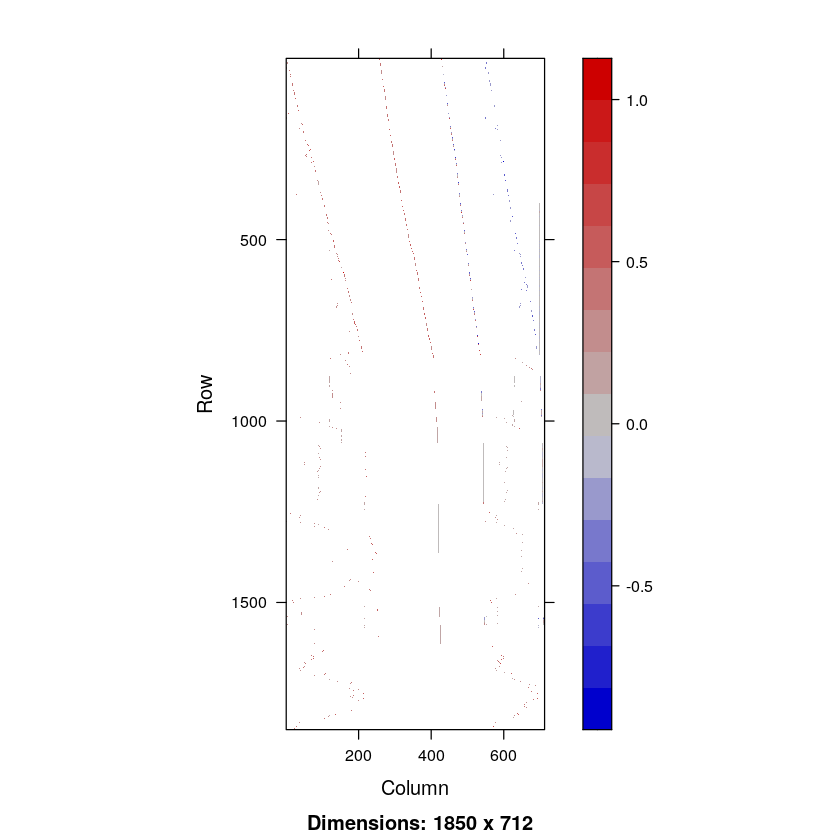

In [10]:
# Class of mm:
print(paste('class of mm: ',class(KNex$mm)))
print('shape of mm:')
print(dim(KNex$mm))
image(KNex$mm)
str(KNex$mm)


In [11]:
# y: 
print(paste('class of y: ',class(KNex$y)))


[1] "class of y:  numeric"


Also use: https://www.rdocumentation.org/packages/Matrix/versions/1.3-4/topics/KNex<br><br>
**mm:**<br>
Here you can see that mm is of type dbl. We find out that it is a dgCMatrix object.<br>
To the structure of mm we can read that its a huge matrix with shape 1850x712 but only has 8758 non-zero entries. The plot above shows you the structure of mm with its values in the entries. Furthermore, you can see that the matrix is very sparse. <br><br>
About storing: We can get information about 'slots' for matrix mm. These slots helps us to store big matrices which are highly sparse. For further description look here:<br>
The matrix has 6 slots (use str(KNex$mm)). By 8758 non-zero entries we have the slot 'x' which is a vector with the length of number of non-zero entries (8758) and contains all the non-zero values strarting with the first column (top of that column) and then go to the next.<br> The slot 'i' of length of the number of non-zero elements tells us in which row indices (here starts with index 0) the non-zero elements are (ordered from first appearing element to last appearing by going from column to column). <br> Slot 'p' gives us in the case of nvars columns the number of non-zero elements of each column of column j: M@p[j+2]-M@p[j+1] = number_non-zero_elements_in_col_j. <br> Slot 'dim' gives us shape of matrix mm. <br> Slot 'factors' stores factorization when facotorization or decomposition is done on mm. 
<br><br>
**y:** <br>
y is a numeric vector.

In [24]:
# Sparsity of the matrix mm:
number_entries <- KNex$mm@Dim[1]*KNex$mm@Dim[2]
number_non_zero_entries <- length(KNex$mm@x)
sparsity <- number_non_zero_entries/number_entries
print(paste('sparsity level = ', sparsity))


[1] "sparsity level =  0.00664667476465229"


In [13]:
print(paste('Mega bytes of storing dgCMatrix mm: ', object.size(KNex$mm)/10^6))

print(paste('Mega byte of storing mm as a usual matrix: ',object.size(as.matrix(KNex$mm))/10^6))


[1] "Mega bytes of storing dgCMatrix mm:  0.109416"
[1] "Mega byte of storing mm as a usual matrix:  10.537992"


## Example 3

In [14]:
#install.packages('pracma')


In [15]:
#library(pracma) # to get condition numbers
#https://www.rdocumentation.org/packages/pracma/versions/1.9.9/topics/cond

In [25]:
# create hilbert matrix:
hilbert <- function(dimension=1) 
    {

    hilbert_matrix <- matrix(0, nrow = dimension, ncol = dimension)

    # our indices such that we can navigate through matrix:
    current_row <- 1
    current_col <- 1
    list_index <-1

    hilbert_matrix_t <- t(hilbert_matrix) # take the transpose such that we loop through row-by-row instead of column-by-column
    for(entry in hilbert_matrix_t)
    {

        if(current_col>dimension){current_col<-1; current_row <- current_row+1}
    
        hilbert_matrix_t[list_index] <- 1/(current_row+current_col-1)


        current_col <- current_col+1
        list_index <- list_index+1}

    return(hilbert_matrix_t)
    }



In [26]:
# get condition numbers:
dim1 <- 3
condition_number1 = kappa(hilbert(dim1))
print(paste('condition number for hilbert matrix n=3: ', condition_number1))

dim2 <- 10
condition_number2 = kappa(hilbert(dim2))
print(paste('condition number for hilbert matrix n=10: ', condition_number2))

dim3 <- 20
condition_number3 = kappa(hilbert(dim3))
print(paste('condition number for hilbert matrix n=20: ', condition_number3))


[1] "condition number for hilbert matrix n=3:  646.2247446588"
[1] "condition number for hilbert matrix n=10:  24161872808028.3"
[1] "condition number for hilbert matrix n=20:  23785191378976133120"


In [27]:
# linear equation:
# Solve Ax=b, find b
Hx <- function(dimension)
    {
    x = c(1:dimension)
    return(crossprod(hilbert(dimension), x)) # = b
    }
Hx(dim3)


20.000000
17.354641
15.618373
14.297125
13.229501
12.336876
11.573482
10.909803
10.325489
9.805830
9.339811


In [28]:
# Find x of Ax=b
b <- Hx(dim2)
x_found <- solve(hilbert(dim2),b)


In [29]:
# Compare x_found (result) to originally used x
diff <- abs(c(1:dim2) - x_found) # originally_used_x - found_x
print('Difference vector between originally used x and resulting x:')
print(diff)
diff_sum <- sum(diff)
print(paste('Sum over difference entries of vector: ',diff_sum))


[1] "Difference vector between originally used x and resulting x:"
              [,1]
 [1,] 4.681731e-09
 [2,] 4.074349e-07
 [3,] 8.723467e-06
 [4,] 7.961429e-05
 [5,] 3.808793e-04
 [6,] 1.049482e-03
 [7,] 1.725082e-03
 [8,] 1.669598e-03
 [9,] 8.776046e-04
[10,] 1.931957e-04
[1] "Sum over difference entries of vector:  0.00598459091639691"


You can observe small differences between the originally used x in Ax=b and the estimated x. 